#### Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the NAN values.

When should it be used?? 
It assimes that the data are missing completely ata random(MCAR)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [7]:
df['Age'].dropna().sample()

237    8.0
Name: Age, dtype: float64

In [14]:
def impute_nan(df,variable,median):
    df[variable+'_median']=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]

In [5]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [9]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [16]:
def impute_nan(df,variable,median):
    df[variable+'_median']=df[variable].fillna(median)
    df[variable+'_random']=df[variable]
## it will have the random sample to fill the NA
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
## pandas need to have some index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [17]:
median=df.Age.median()

In [18]:
median

28.0

In [19]:
impute_nan(df,'Age',median)

In [20]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

AttributeError: 'AxesSubplot' object has no attribute 'get_legend_handles_lables'

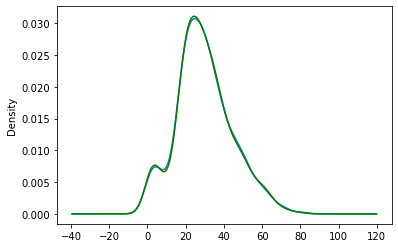

In [23]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_random.plot(kind='kde',ax=ax,color='Green')
lines, lables=ax.get_legend_handles_lables()
ax.legend(lines, lables, loc='best')

#### Advantages
1. Easy to implement
2. There is less distortion in variiance

#### Disadvantages
1. every situation randomness will not work

### 3.Capturing NAN values with a new feature

It's work well if the data are not missing completely at random.

In [25]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [26]:
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [27]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [28]:
df.Age.median()

28.0

In [29]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [30]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### Advantages
1. Easy to implement
2. Captures the importance of missing values
#### Diaadvantages
1.Creating additional features(curse of dimensionality)

### 4. End of Distribution imputation

In [32]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


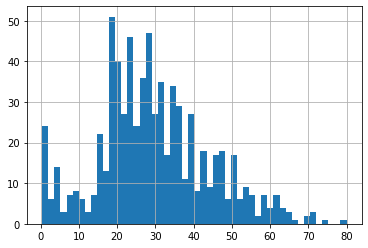

In [34]:
df.Age.hist(bins=50)

In [35]:
df.Age.mean()

29.69911764705882

In [39]:
## Std deviation
extreme=df.Age.mean()+3*df.Age.std()

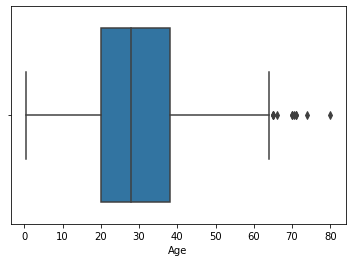

In [38]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [40]:
def impute_nan(df,variable,median,extreme):
    df[variable+'_end_distribution']=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [41]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [42]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


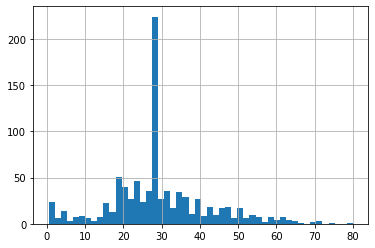

In [43]:
df['Age'].hist(bins=50)

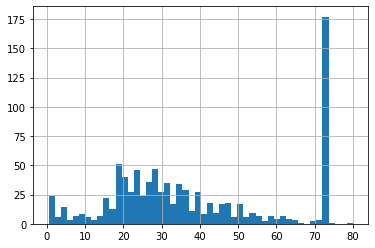

In [44]:
df['Age_end_distribution'].hist(bins=50)

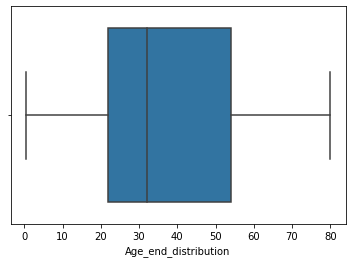

In [45]:
sns.boxplot('Age_end_distribution',data=df)

#### Advantages
1. Easy to implement
2. captures the importance of missingness if there is one.
#### Disadvantages
1. Distorts the original distribution of the variable
2. if missingness is not important, it may mask the prediction power of the original variable by distorting its distribution.
3. if the number of NA is big, it will mask true outliers in the distribution.
4. if the no of NA is small, the replaced NA may be considered an outlier and pre_processed in a subsequent feature engineering.